In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'


In [11]:
from IPython.display import display, clear_output
import sys

sys.path.append("../../..")

import torch
import numpy as np
import matplotlib.pyplot as plt

from magrec.prop.Fourier import FourierTransform2d
from magrec.prop.Kernel import (
    HarmonicFunctionComponentsKernel,
    MagneticFieldToCurrentInversion2d,
)
from magrec.prop.Propagator import CurrentPropagator2d, AxisProjectionPropagator
from magrec.misc.plot import plot_n_components
from magrec.nn.arch import GeneratorCNN
from magrec import __datapath__

from magrec.misc.load import load_matlab_data

from magrec.prop.Pipeline import (
    Pipe,
    HannFilter,
    GaussianFilter,
    Union,
    PlotResults,
    FourierZeroDivergenceConstraint2d,
    CurrentLayerToField,
    Projection,
    Sandwich,
    Padder,
    Function,
    FourierDivergence2d,
)

from magrec.scripts.prototype_pipeline import Prototype
import torchvision.transforms as T

from magrec.nn.arch import UNet, BnCNN, FCCNN, GioUNet, GioCNN

from magrec.scripts.prototype_pipeline import Prototype, AdjustLROnLoss, LRScheduler

In [34]:
dx = 0.1
dy = 0.1
height = 0.015  # μm
layer_thickness = 0.030  # μm

pipe = Pipe(
    [
        ("plot1", PlotResults(labels=[r"$J_x$", r"$J_y$"], units=r"mA/m$^2$", title="Input current", cmap="RdBu_r")),
        (
            "B",
            CurrentLayerToField(
                dx=dx, dy=dy, height=height, layer_thickness=layer_thickness
            ),
        ),
        (
            "plot2",
            PlotResults(
                labels=[r"$B_x$", r"$B_y$", r"$B_z$", r"$B_{NV}$"], units=r"$\mu T$", title="Output field", cmap="RdBu_r"
            ),
        ),
    ]
)

Check limiting cases first.

1. Uniform current density in x-direction $J_x = 1$:
    expected output: $B_y = - \frac{\mu_0}{2} J_x$
2. Uniform current density in y-direction $J_y = 1$:
    expected output: $B_x = \frac{\mu_0}{2} J_y$

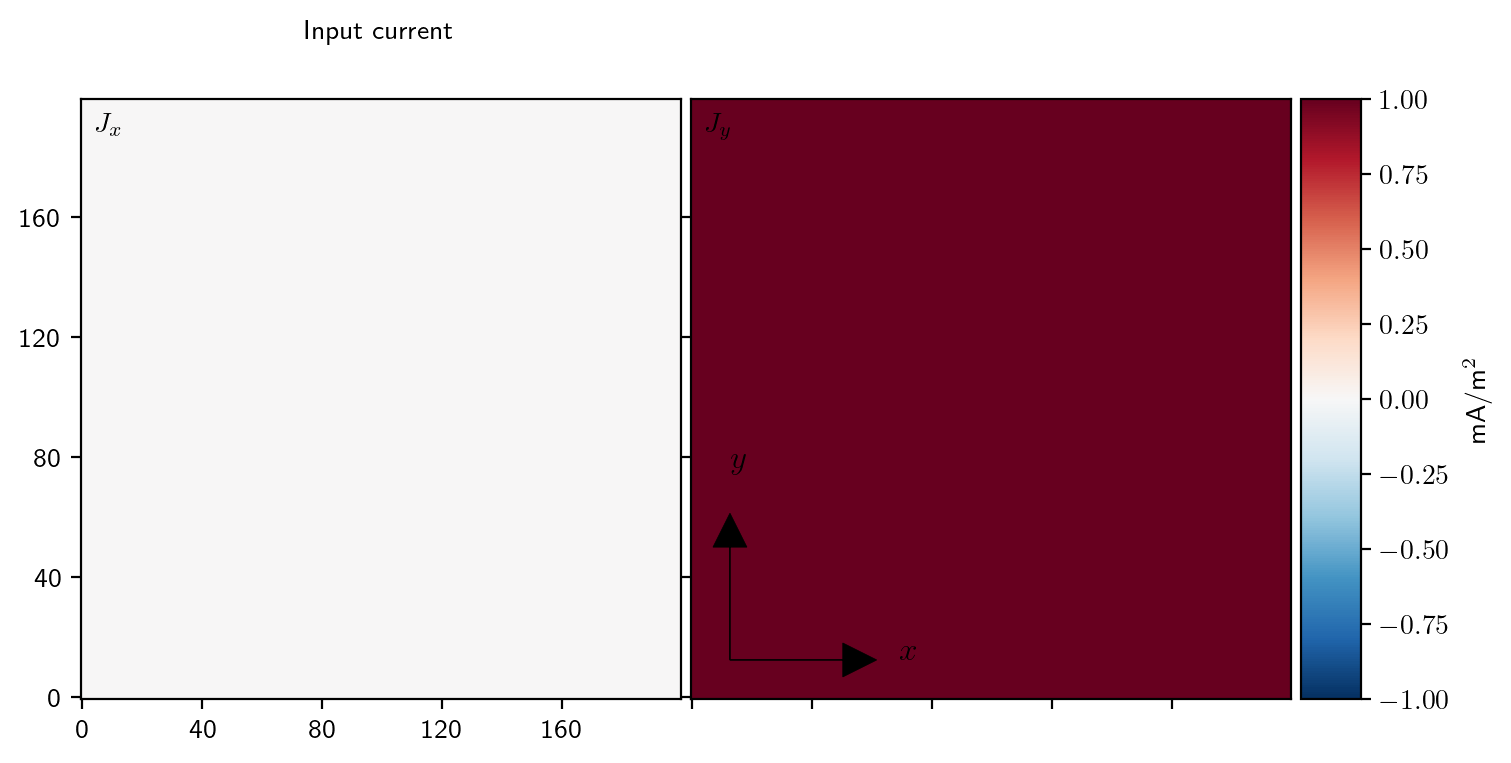

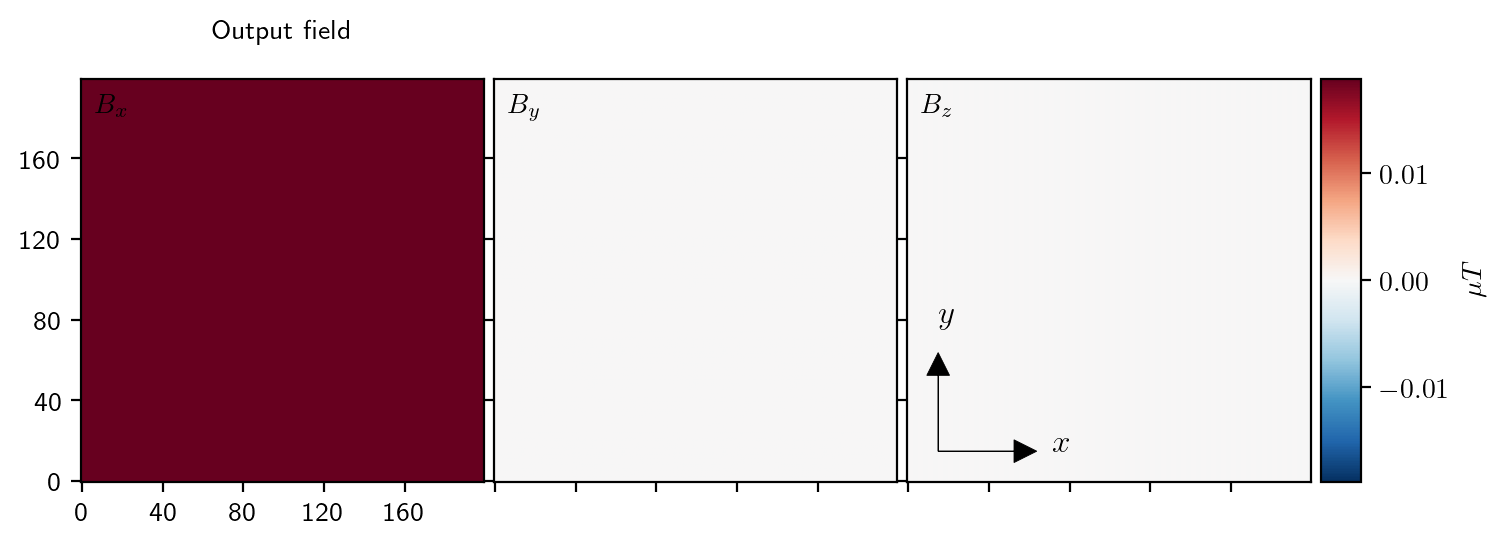

In [40]:
Jx = torch.zeros(200, 200)
Jy = torch.ones(200, 200)

current = torch.stack((Jx, Jy), dim=0)

pipe.fit(current).transform(current);

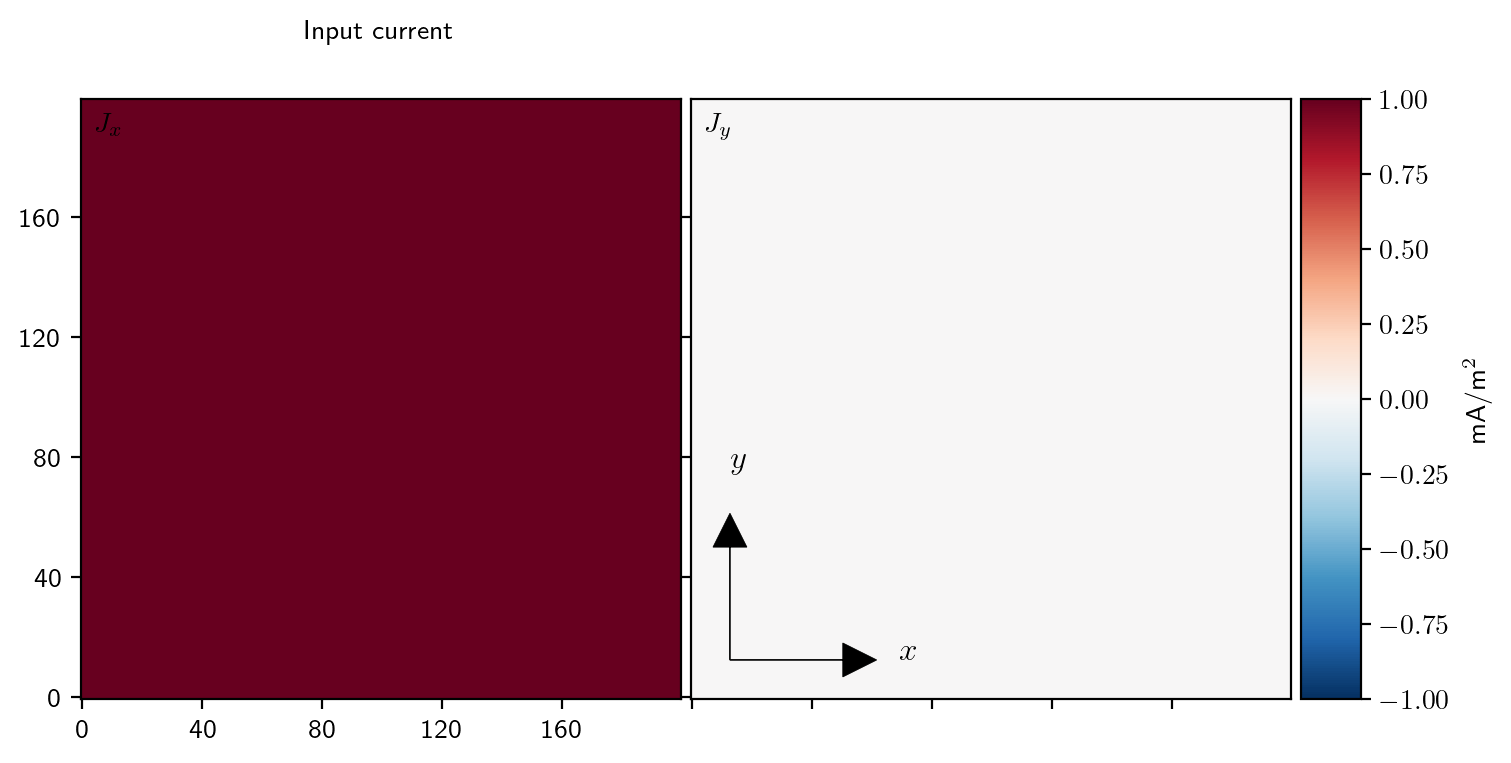

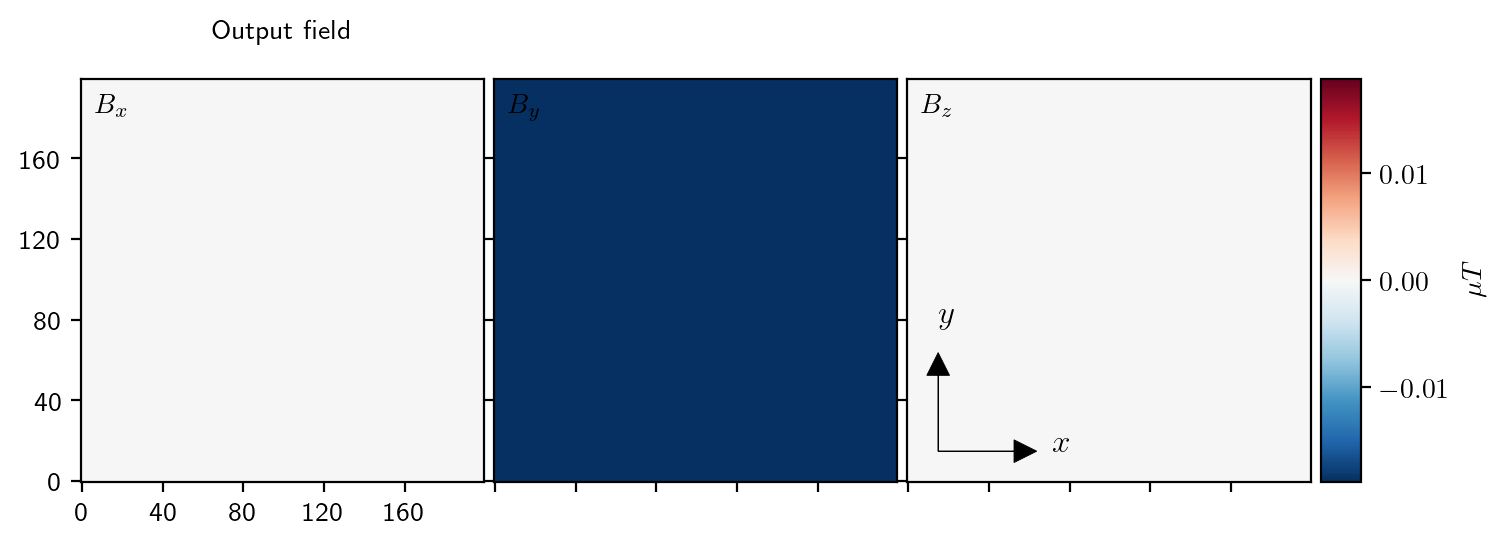

In [41]:
Jx = torch.ones(200, 200)
Jy = torch.zeros(200, 200)

current = torch.stack((Jx, Jy), dim=0)

pipe.fit(current).transform(current);

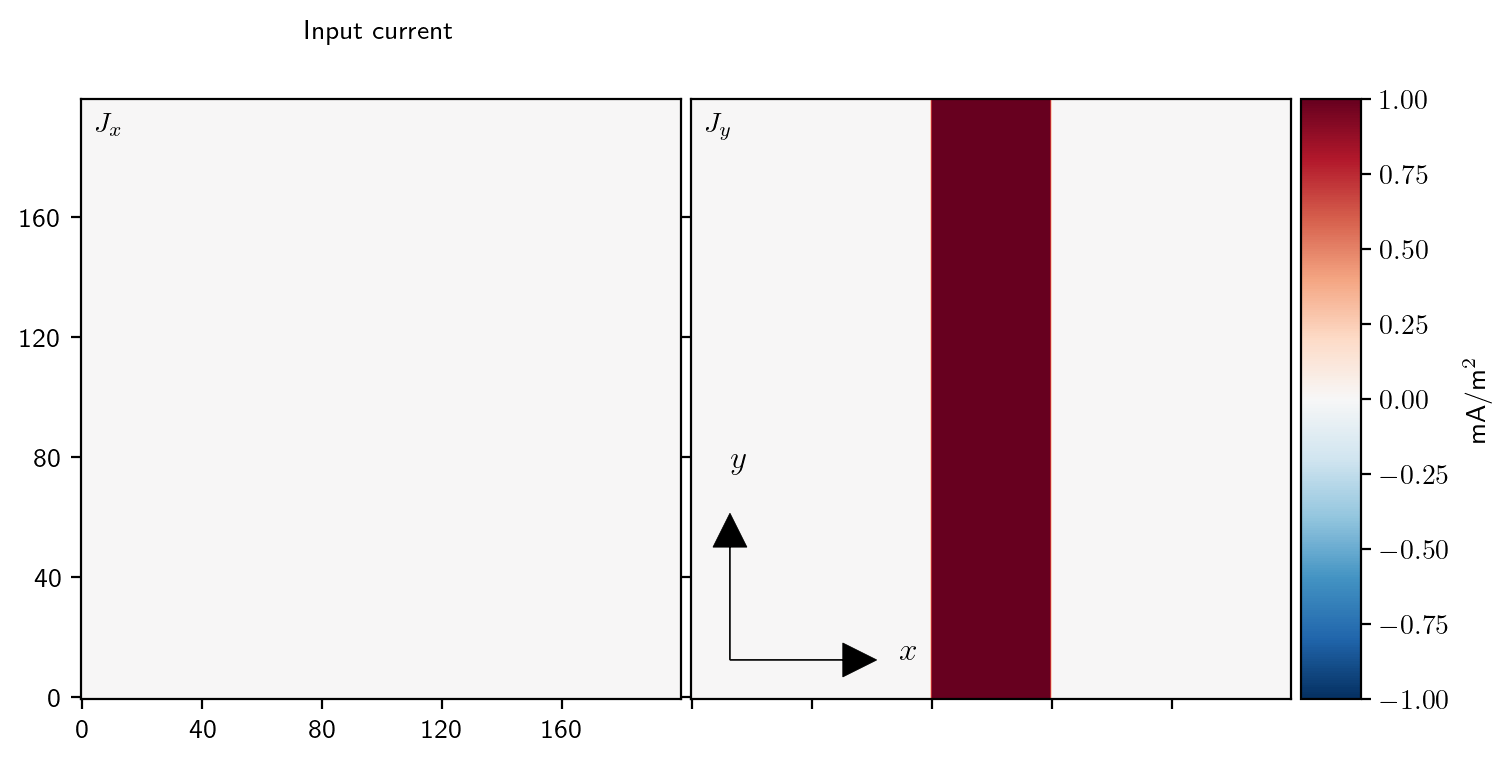

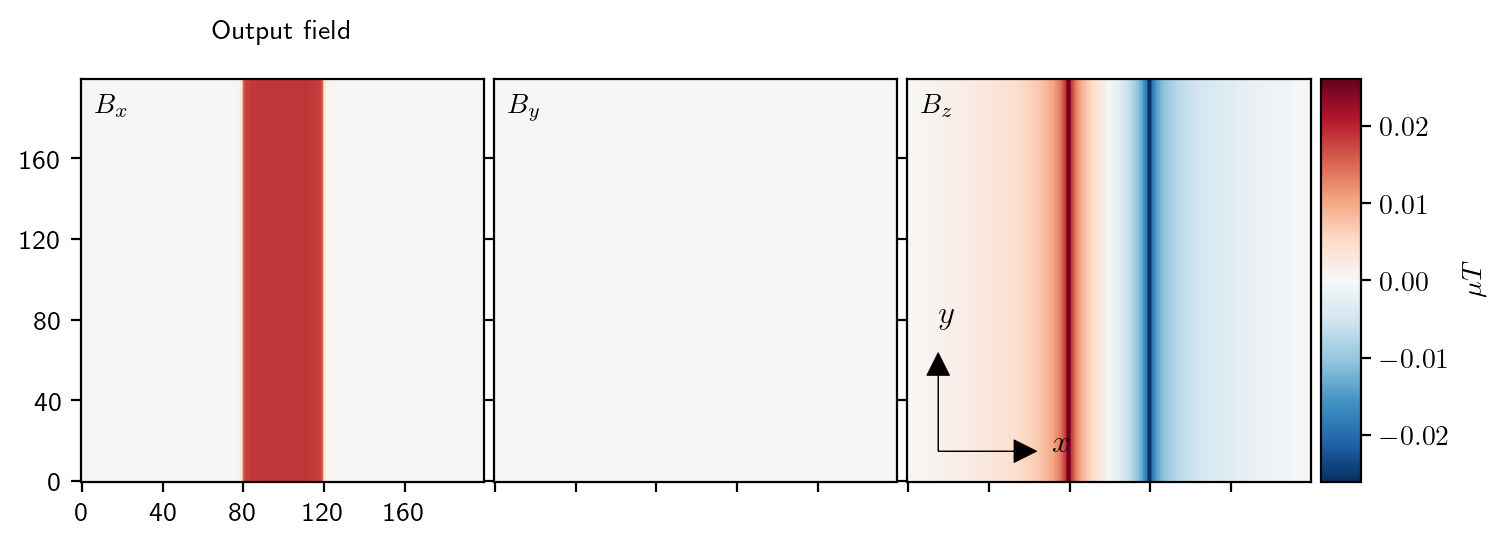

In [42]:
Jx = torch.zeros(200, 200)
Jy = torch.zeros(200, 200)

Jy[80:120, :] = 1

current = torch.stack((Jx, Jy), dim=0)

pipe.fit(current).transform(current);

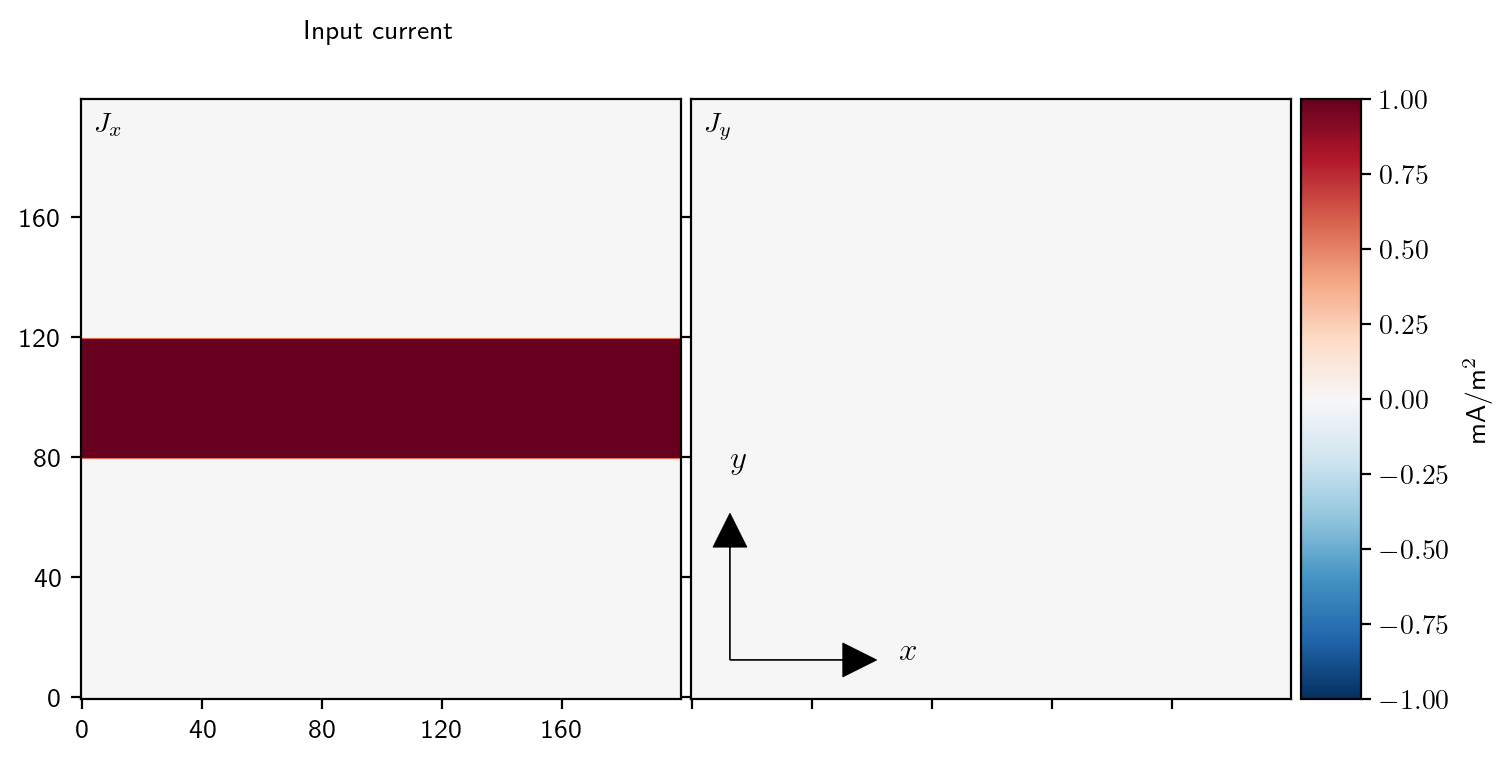

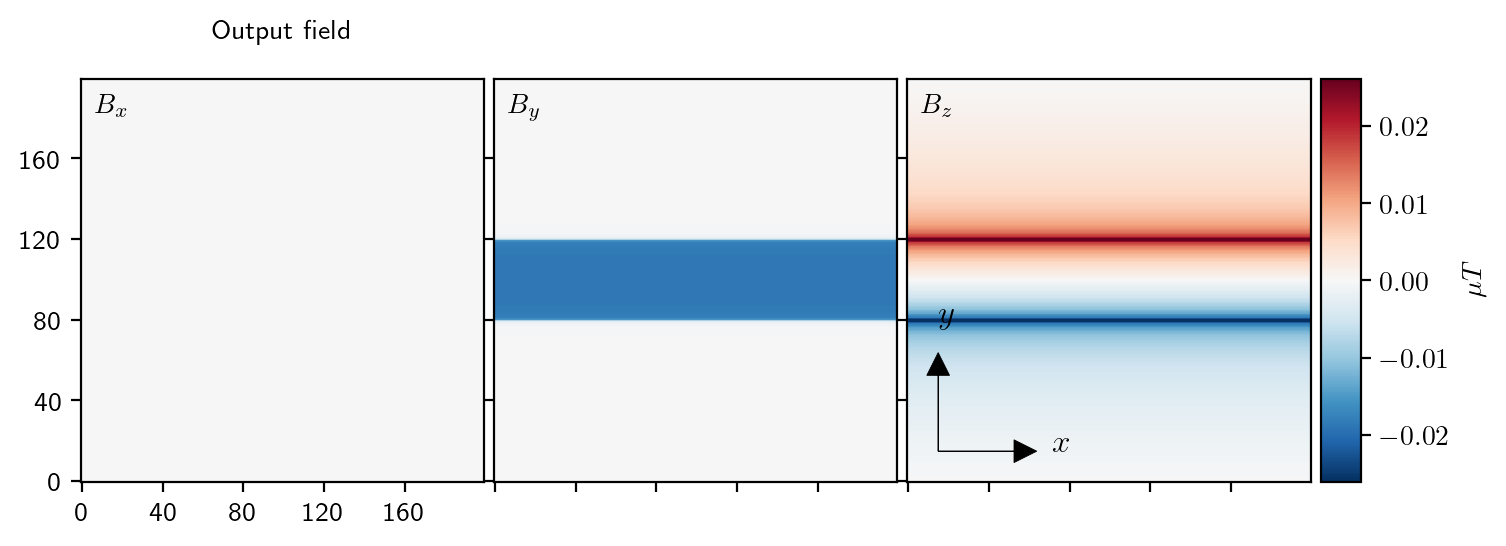

In [43]:
Jx = torch.zeros(200, 200)
Jy = torch.zeros(200, 200)

Jx[:, 80:120] = 1

current = torch.stack((Jx, Jy), dim=0)

pipe.fit(current).transform(current);